# <font color='blue'>Modelo de ML para previsão de ocorrências de diabetes</font>


## Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [1]:
# Importando os módulos
import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline             

In [2]:
# Carregando o dataset
df = pd.read_csv("pima-data.csv")   

In [3]:
# Verificando o formato dos dados
df.shape

(768, 10)

In [4]:
# Verificando as primeiras linhas do dataset
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [6]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

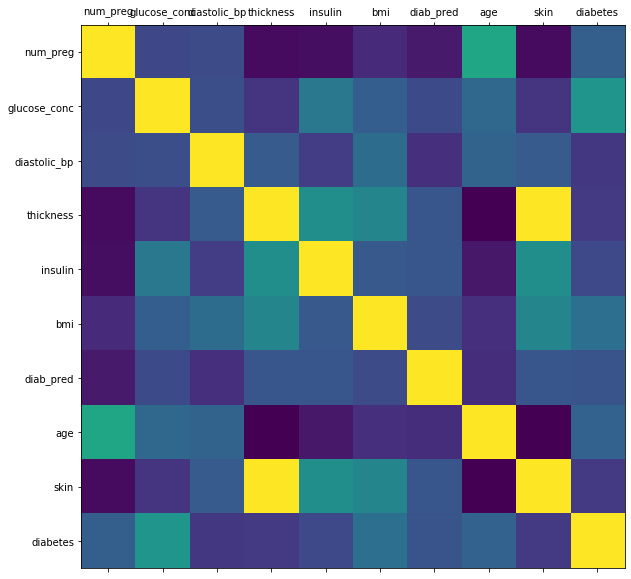

In [7]:
# Criando o gráfico
plot_corr(df)

In [8]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


In [9]:
# Definindo as classes
diabetes_map = {True : 1, False : 0}

In [10]:
# Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [11]:
# Verificando as primeiras linhas do dataset
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [12]:
# Verificando como os dados estão distribuídos
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


## Spliting

70% para dados de treino e 30% para dados de teste

In [13]:
import sklearn as sk

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [16]:
# Variável a ser prevista
atrib_prev = ['diabetes']

In [17]:
# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [18]:
# Definindo a taxa de split
split_test_size = 0.30

In [19]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [20]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


In [21]:
X_treino

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

## Verificando o Split

In [22]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


## Valores Missing Ocultos



In [23]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [24]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [25]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


## Tratando Dados Missing - Impute 
Substituindo os valores iguais a zero, pela média dos dados

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

## Construindo e treinando o modelo

In [28]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [29]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [30]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Verificando a exatidão no modelo nos dados de treino

In [31]:
from sklearn import metrics

In [32]:
nb_predict_train = modelo_v1.predict(X_treino)

In [33]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.7542



## Verificando a exatidão no modelo nos dados de teste

In [34]:
nb_predict_test = modelo_v1.predict(X_teste)

In [35]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.7359



## Métricas

In [36]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Salvando o modelo treinado

In [37]:
import pickle

In [40]:
# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado.sav'
pickle.dump(modelo_v1, open(filename, 'wb'))

# Fim